
#Sentimental Analysis Project:

In [539]:
!pip install vaderSentiment

In [0]:
#import Library
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import spacy
from collections import Counter
from bs4 import BeautifulSoup

In [0]:
#create dataset
import pandas as pd
df = pd.read_csv('saltyhacker.csv')

In [0]:
#Str the data
df['Text'] = df['Text'].astype(str)

In [543]:
#count Str
search ="a"
df["count"]= df["Text"].str.count(search, re.I)
df

,User,Text,count
0,thu2111,Did those people criticise other epidemiologis...,105
1,noisy_boy,I like Aliexpress because most of the times I ...,23
2,lopis,Doesn&#x27;t really matter. The progression of...,21
3,aexol,I have added docs generator for GraphQL Editor...,21
4,frockington1,I haven;t seen any non sensationalized evidenc...,13
...,...,...,...
1674,zxcmx,I don&#x27;t see any particular moral value in...,22
1675,mrighele,What set in stone the equality for me was lear...,39
1676,dtf,The MapZen elevation tilesets are on S3:<p><a ...,19
1677,pjc50,"The charges seem comparatively light, even for...",10


#CLEAN DATA

In [0]:
#clean DF
def clean_description(desc):
  soup = BeautifulSoup(desc)
  return soup.get_text()
df['rating'] = df['Text'].apply(clean_description)

In [545]:
#clean HTML
import lxml.html.clean 
from bs4 import BeautifulSoup 

lxml.html.clean.clean_html('<html><head></head><bodyonload = loadfunc()>my text</body></html>')
print (BeautifulSoup('<').string) 
print (BeautifulSoup('&').string) 

None
None


In [0]:
#CLEAN DATA
#remove whitespace
df['rating'] = df['rating'].str.strip().str.lower()
df['Text'] = df['Text'].str.strip().str.lower()
df['Text'] = df['Text'].str.strip().str.lower()

#Start with date
df['rating'].str.match('\d?\d/\d?\d/\d{4}').all()

df['rating'] = df['rating'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

df['Text'] = df['Text'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [547]:
df.head()

,User,Text,count,rating
0,thu2111,did those people criticise other epidemiologis...,105,did those people criticise other epidemiologis...
1,noisy_boy,i like aliexpress because most of the times i ...,23,i like aliexpress because most of the times i ...
2,lopis,doesnxt really matter the progression of the s...,21,doesnt really matter the progression of the se...
3,aexol,i have added docs generator for graphql editor...,21,i have added docs generator for graphql editor...
4,frockington1,i havent seen any non sensationalized evidence...,13,i havent seen any non sensationalized evidence...


In [548]:
df['rating'].value_counts(normalize=True)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    0.022037
can be disastrous for a country as dense as india and for incubation periods as long as they are for a rabidly contagiou

#SENTIMENT ANALYSIS USING IN DE MODEL VADER
"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment intensity tool added to NLTK in 2014. 

Unlike other techniques that require training on related text before use, VADER is ready to go for analysis without any special setup. VADER is unique in that it makes fine-tuned distinctions between varying degrees of positivity and negativity. 

For example, VADER scores “comfort” moderately positively and “euphoria” extremely positively. It also attempts to capture and score textual features common in informal online text such as capitalizations, exclamation points, and emoticons."

https://programminghistorian.org/en/lessons/sentiment-analysis

http://www.nltk.org/_modules/nltk/sentiment/vader.html

In [0]:
#https://programminghistorian.org/en/lessons/sentiment-analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [0]:
def vaderize(sentence):
    return analyzer.polarity_scores(sentence)

In [0]:
#creared columns score with numbers
df['Scores'] = df['rating'].apply(vaderize)

In [0]:
df[['negative', 'neutral', 'positive', 'veryPositive']] = df.Scores.apply(pd.Series)

In [553]:
for text in df.sort_values(by='neutral', ascending=False)['rating'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n\n")

------ Topic ------
custom graphics and web design projects just had to start the timer keep track of what we were doing and submit the final time with teams it all adds up and you can see everyones time it took on a project and you can all add to the same time record

------ Topic ------
i just ordered a brand new apple macbook air with gigs for my daughter i cant even get apple to charge my card and ship the thing their estimate is midmay but i havent seen any traction on it at all its as if i didnt even order it

------ Topic ------
that makes sense though i suppose for a road warrior setup the source ip might change every so often right

------ Topic ------
false the se came out after the s

------ Topic ------
nan



In [0]:
#library to create graphic and to see the value
from collections import Counter
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings
from wordcloud import WordCloud 

bad = df[df['negative'] <= 2 ]
good = df[df['positive'] >= 4 ]
neutral = df[df['neutral'] == 3 ]
veryPositive =df[df['veryPositive'] == 5]

In [555]:
df['positive'].value_counts() 

0.000    503
0.114     13
0.073     13
0.069     12
0.092     12
        ... 
0.577      1
0.412      1
0.304      1
0.247      1
0.306      1
Name: positive, Length: 300, dtype: int64

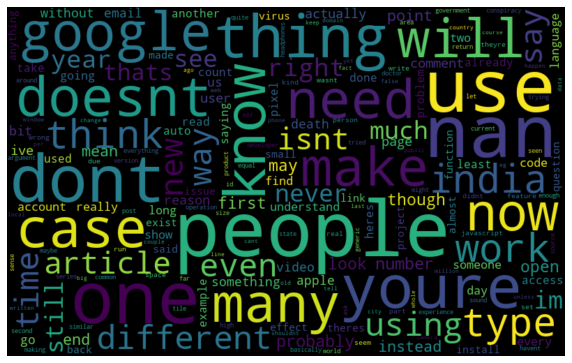

In [556]:
normal_words =' '.join([text for text in df['rating'][df['positive'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [557]:
df['neutral'].value_counts() 

1.000    311
0.842     12
0.865     12
0.882     11
0.833     11
        ... 
0.686      1
0.488      1
0.680      1
0.607      1
0.665      1
Name: neutral, Length: 367, dtype: int64

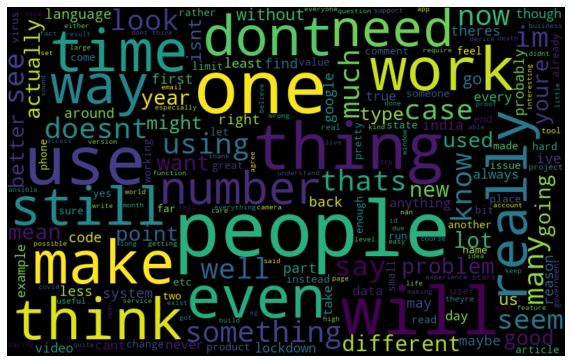

In [558]:
all_words = ' '.join([text for text in df['rating']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [559]:
df['negative'].value_counts() 

0.000    731
0.044     12
0.031     11
0.033     11
0.051     11
        ... 
0.139      1
0.328      1
0.268      1
0.261      1
0.241      1
Name: negative, Length: 251, dtype: int64

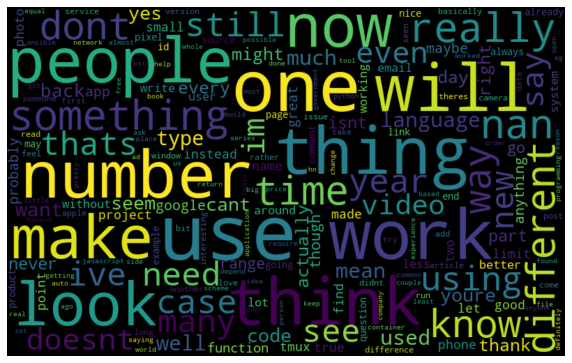

In [561]:
negative_words = ' '.join([text for text in df['rating'][df['negative'] == 0]])

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#LEMMATIZE DATASET

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [0]:
# define additional stop words

my_stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
                 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
                 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
                 "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
                 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
                 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 
                 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
                 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
                 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
                 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
                 'into', 'through', 'during', 'before', 'after', 'above', 'below',
                 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 
                 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
                 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
                 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 
                 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
                 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 
                 "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                 "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 
                 "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 
                 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
                 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
                 "weren't", 'won', "won't", 'wouldn', "wouldn't"]

STOP_WORDS = nlp.Defaults.stop_words.union(my_stop_words)

In [564]:
# add lemmatizations for the reviews to the dataframe
import spacy

nlp = spacy.load('en_core_web_sm')

import re

has_number_pattern = re.compile('\d')
is_empty_pattern = re.compile('^\s*$')

lemmas = []

for doc in nlp.pipe(df['Text'], batch_size=500):
    doc_lemmas = []
    for token in doc:
        if (not token.is_stop  
            and not token.is_punct  
            and token.pos_ != 'PRON'  
            and not is_empty_pattern.match(token.text)  
            and not has_number_pattern.search(token.text)  
            and len(token.lemma_) >= 3  
            and token.lemma_ not in STOP_WORDS):  
                doc_lemmas.append(token.lemma_)
    lemmas.append(doc_lemmas)

assert len(lemmas) == df.shape[0]

df['lemmas'] = lemmas
df.head()

,User,Text,count,rating,Scores,negative,neutral,positive,veryPositive,lemmas
0,thu2111,did those people criticise other epidemiologis...,105,did those people criticise other epidemiologis...,"{'neg': 0.128, 'neu': 0.848, 'pos': 0.024, 'co...",0.128,0.848,0.024,-0.9782,"[people, criticise, epidemiologist, immediatel..."
1,noisy_boy,i like aliexpress because most of the times i ...,23,i like aliexpress because most of the times i ...,"{'neg': 0.051, 'neu': 0.912, 'pos': 0.037, 'co...",0.051,0.912,0.037,-0.0000,"[like, aliexpress, time, chat, manufacturerxfd..."
2,lopis,doesnxt really matter the progression of the s...,21,doesnt really matter the progression of the se...,"{'neg': 0.063, 'neu': 0.843, 'pos': 0.094, 'co...",0.063,0.843,0.094,0.4641,"[doesnxt, matter, progression, season, slow, a..."
3,aexol,i have added docs generator for graphql editor...,21,i have added docs generator for graphql editor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"[add, docs, generator, graphql, editor, hrefht..."
4,frockington1,i havent seen any non sensationalized evidence...,13,i havent seen any non sensationalized evidence...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"[non, sensationalized, evidence, long, term, e..."


#WORD COUNTS TO ANALYZE

In [0]:
#create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.
from collections import Counter


def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [566]:
wc = count(df['lemmas'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,like,287,376,1.0,0.008744,0.008744,0.170935
46,people,219,309,2.0,0.007186,0.015929,0.130435
101,work,201,259,3.0,0.006023,0.021952,0.119714
129,donxt,195,249,4.0,0.005790,0.027743,0.116141
138,use,202,248,5.0,0.005767,0.033510,0.120310
523,think,180,231,6.0,0.005372,0.038882,0.107207
284,thing,175,222,7.0,0.005163,0.044044,0.104229
249,number,116,221,8.0,0.005139,0.049184,0.069089
121,itxs,169,206,9.0,0.004790,0.053974,0.100655
103,time,149,191,10.0,0.004442,0.058416,0.088743


#GRAPH TOP WORDS

In [567]:
!pip install squarify

In [0]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

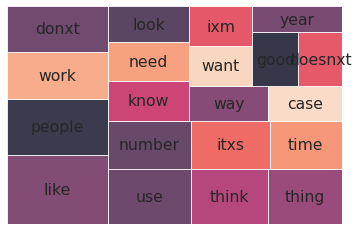

In [570]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

#TEXT CLASSIFICATION USING K NEAREST NEIGHBORS

Nearest Neighbors is a model that has the process for each target word to be refined, the top-k
semantically similar nearest neighbors are first selected and ranked in descending order of their cosine similarities.  The left ranked list shows the top 10 nearest neighbors for the target word good. 

The semantically ranked list is then sentimentally re-ranked based on the absolute difference of the valence scores between the target word and the words in the list. A smaller difference indicates that the word is more sentimentally similar to the target word, and thus will be ranked higher. the re-ranking step can rank the sentimentally similar neighbors higher and the dissimilar neighbors lower. In the refinement model, the higher  ranked sentimentally similar neighbors will receive a higher weight to refine the pre-trained vector of the target word.

https://www.aclweb.org/anthology/D17-1056.pdf

In [571]:
#create Data Clean desc
data = df['rating']
data

0       did those people criticise other epidemiologis...
1       i like aliexpress because most of the times i ...
2       doesnt really matter the progression of the se...
3       i have added docs generator for graphql editor...
4       i havent seen any non sensationalized evidence...
                              ...                        
1674    i dont see any particular moral value in chore...
1675    what set in stone the equality for me was lear...
1676    the mapzen elevation tilesets are on shttpswww...
1677    the charges seem comparatively light even for ...
1678    a observation regarding the effectiveness of c...
Name: rating, Length: 1679, dtype: object

In [572]:
#Count Vectorizer 
vector = CountVectorizer(stop_words='english')

# build vocab
vector.fit(data)

# transform text
dtm = vector.transform(data)

type(dtm.todense())

numpy.matrix

In [573]:
#matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [574]:
#features name, Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vector.get_feature_names())
dtm.head()

,aaa,aaan,aac,abandoned,abandoning,abbreviated,abbreviation,abilities,ability,able,abomination,abortions,aboutanother,aboutapp,aboveand,abroad,absence,absolute,absolutely,absolve,abstract,abstracted,abstraction,abstractions,abstractpatterndecoratorproxysingletonfactoryfactory,absurd,abundance,abundant,abundantly,abuse,abusers,abuses,abusive,abysmal,abysmally,ac,academialand,academic,academics,accelerating,...,young,younger,youpeace,youranti,youre,yourselffunctor,yourselfi,yoursits,yousave,youthanks,youthe,youthis,youtube,youtubers,youve,yr,yt,ythis,yup,yythank,zap,zealand,zealanders,zealotry,zeitgeist,zeno,zenos,zero,zeroes,zerokid,zerotier,zeta,zfc,zhang,zig,zika,zip,zone,zones,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [575]:
sum(dtm['zerotier'])

2

In [0]:
#Attributes
result = []
for col in dtm:
  x = sum(dtm[col])
  result.append(x)

data = zip(vector.get_feature_names(), result)
words = pd.DataFrame(data, columns=['words', 'count'])

In [577]:
words['rank'] = words['count'].rank(method='first',ascending=False)
words.tail()

,words,count,rank
11320,zika,3,3235.0
11321,zip,1,11325.0
11322,zone,3,3236.0
11323,zones,2,4798.0
11324,zoom,3,3237.0


In [578]:
words[words['rank']<=5]

,words,count,rank
2865,dont,291,4.0
5590,just,336,2.0
5870,like,370,1.0
7371,people,309,3.0
10671,use,231,5.0


In [579]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = df['rating']

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,aaa,ability,able,absence,absolute,absolutely,abstract,abstraction,abstractions,abstractpatterndecoratorproxysingletonfactoryfactory,absurd,abuse,abysmal,ac,academic,accept,acceptable,accepting,access,accessibility,accessible,accidentally,accomplish,according,account,accounts,accuracy,accurate,accurately,achieve,achilles,ack,acknowledge,acknowledgement,acknowledging,acquired,acronym,act,acted,acting,...,written,wrong,wrote,wrt,wuhan,xamarin,xgetkey,xgetvalue,xi,xlaunch,xml,xrays,yall,yeah,year,yearold,years,yep,yes,yield,yikes,yo,youd,youll,young,younger,youre,youtube,youve,yt,zenos,zero,zeroes,zerotier,zfc,zig,zika,zone,zones,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.072152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [580]:
from sklearn.neighbors import NearestNeighbors

#Fit on DTM

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [581]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0., 1., 1., 1., 1.]]), array([[  0, 203,  35, 806, 269]]))

In [582]:
#Query using kneighbors

nn.kneighbors([dtm.iloc[276]])

(array([[0., 1., 1., 1., 1.]]), array([[276, 806, 203, 269,  35]]))

In [583]:
data[276][:150]

'did you see police beating people yourself i have a suspicion that it was made just for camera to scare people'

#SIMPLE MODEL USING TEXTBLOB LIBRARY

TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and is a simple interface.

In [584]:
import csv
from textblob import TextBlob

article = 'saltyhacker.csv'

with open(article, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[0]
        print (sentence)
        blob = TextBlob(sentence)
        print (blob.sentiment)

User
Sentiment(polarity=0.0, subjectivity=0.0)
thu2111
Sentiment(polarity=0.0, subjectivity=0.0)
noisy_boy
Sentiment(polarity=0.0, subjectivity=0.0)
lopis
Sentiment(polarity=0.0, subjectivity=0.0)
aexol
Sentiment(polarity=0.0, subjectivity=0.0)
frockington1
Sentiment(polarity=0.0, subjectivity=0.0)
alpaca128
Sentiment(polarity=0.0, subjectivity=0.0)
alkonaut
Sentiment(polarity=0.0, subjectivity=0.0)
giantg2
Sentiment(polarity=0.0, subjectivity=0.0)
9wzYQbTYsAIc
Sentiment(polarity=0.0, subjectivity=0.0)
Jonnax
Sentiment(polarity=0.0, subjectivity=0.0)
Chris2048
Sentiment(polarity=0.0, subjectivity=0.0)
thu2111
Sentiment(polarity=0.0, subjectivity=0.0)
winkeltripel
Sentiment(polarity=0.0, subjectivity=0.0)
pjmlp
Sentiment(polarity=0.0, subjectivity=0.0)
Waterluvian
Sentiment(polarity=0.0, subjectivity=0.0)
leejo
Sentiment(polarity=0.0, subjectivity=0.0)
waynenilsen
Sentiment(polarity=0.0, subjectivity=0.0)
cameronbrown
Sentiment(polarity=0.0, subjectivity=0.0)
asdkjh345fd
Sentiment(polar

In [585]:
#create a textblob object
obj = TextBlob(article)

#Returns a value between -1 and 1
sentiment = obj.sentiment.polarity
print(sentiment)

0.0


In [586]:
if sentiment == 0:
  print('The text is neutral')
elif sentiment > 0:
  print('The text is positive')
else:
  print('The Text is negative')

The text is neutral
